In [ ]:
# !wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/SeaPlaneTravel.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('SeaPlaneTravel.csv')

In [3]:
df.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# Date - Index & datetime format
df = pd.read_csv('SeaPlaneTravel.csv', parse_dates=['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df.set_index('Month',inplace=True)
df.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [7]:
df.columns=['Passengers']

In [8]:
df.head()

,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [9]:
df.tail()

,Passengers
Month,
2015-08-01,606
2015-09-01,508
2015-10-01,461
2015-11-01,390
2015-12-01,432


<Axes: xlabel='Month'>

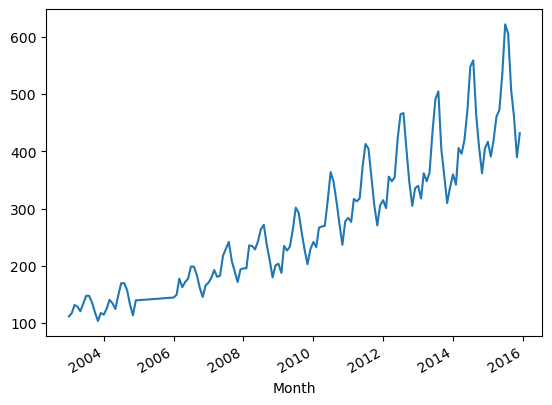

In [10]:
df['Passengers'].plot()
#lineplot

In [ ]:
# Hypothesis Test
# Steps in Hypothesis Test
# Step 1 : Specify null and alternate hypothesis
# Step 2 : Choose the Hypothesis test
# Step 3 : calculate the p-value/critical value for the given dataset
# step 4 : check if p-value is greater than 0.05 (Null Hypothesis follows, else alternate Hypothesis follows)
# Step 5 : Describe if its Null hypothesis or alternate hypothesis follows

In [11]:
# adfuller test - to check for stationarity

# Step 1 : Null Hypothesis - given data is a non-stationary time series,
        # Alternate - given data is a stationary time series data
# Step 2 : adfuller test
# Step 3 : calulation of p-value
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Passengers'])
p_value = result[1]
print(f"p-value is : {p_value}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.9918802434376408
The given time series is a - Non Stationary Time series (Null Hypothesis follows)


In [12]:
result

(0.8153688792060371,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

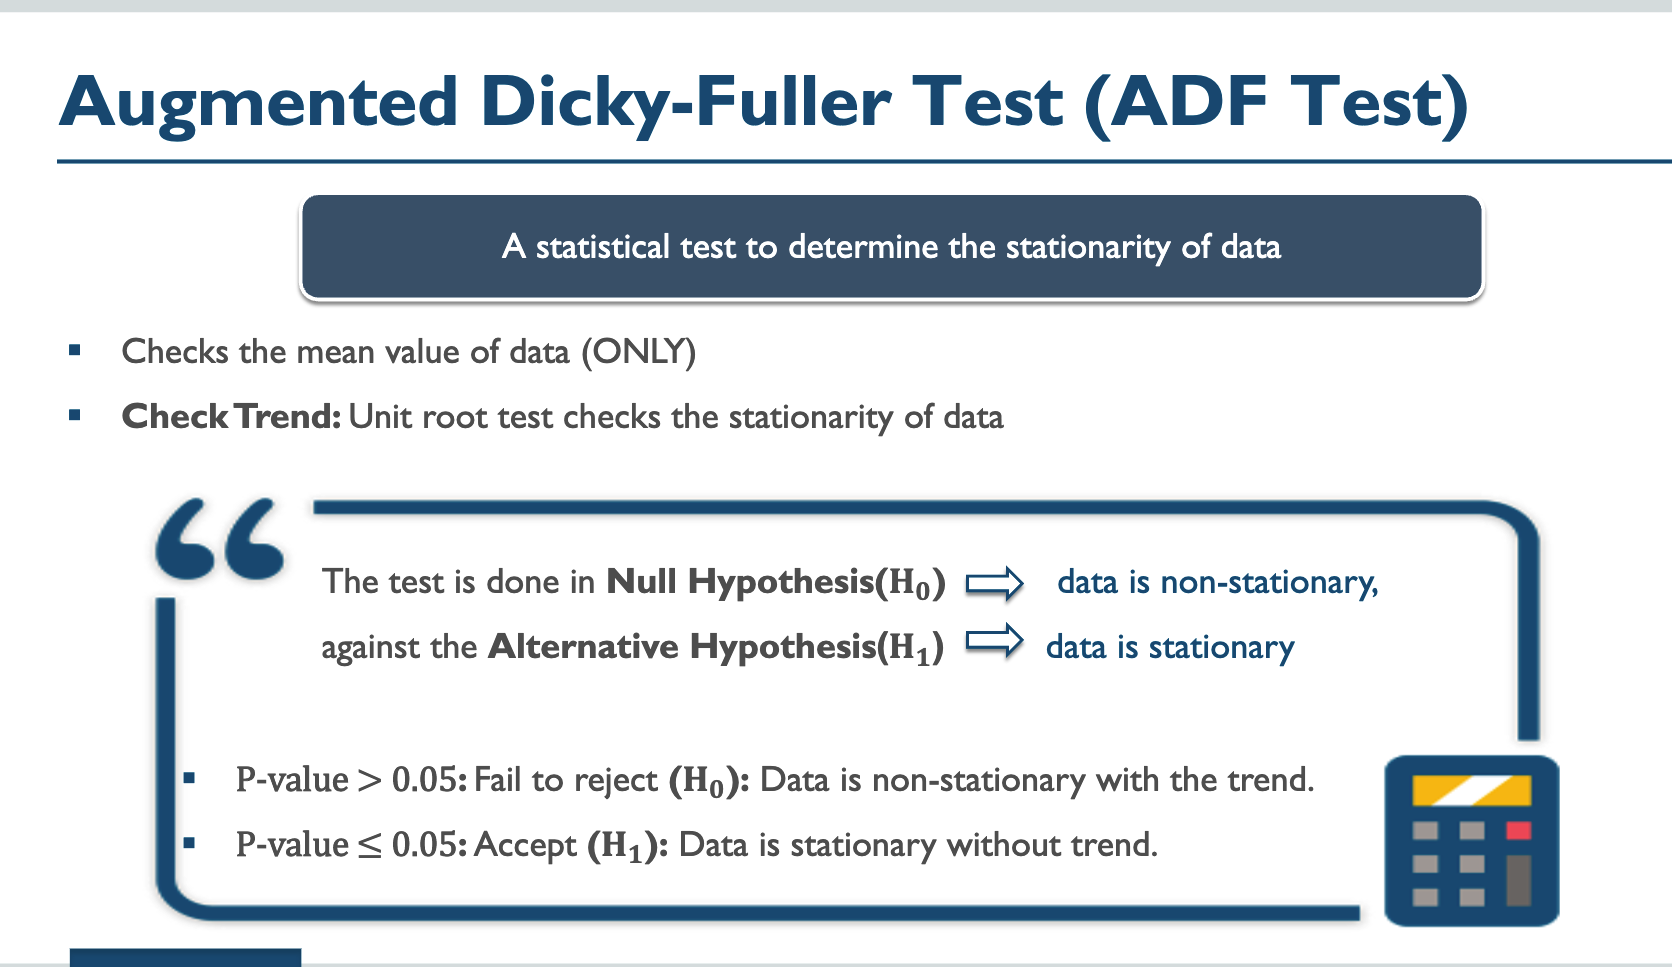

In [13]:
# log transformation
result = adfuller(np.log(df['Passengers']))
p_value = result[1]
print(f"p-value is : {p_value}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.422366774770388
The given time series is a - Non Stationary Time series (Null Hypothesis follows)


In [14]:
# 1st order difference
result = adfuller((df['Passengers'].diff().dropna()))
p_value = result[1]
print(f"p-value is : {p_value}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.05421329028382792
The given time series is a - Non Stationary Time series (Null Hypothesis follows)


In [15]:
# 2nd order difference
result = adfuller((df['Passengers'].diff().diff().dropna()))
p_value = result[1]
print(f"p-value is : {round(p_value,2)}")

if (p_value>0.05):
  print("The given time series is a - Non Stationary Time series (Null Hypothesis follows)")
else:
  print("The given time series is a - Stationary Time series (Alternate Hypothesis follows)")

p-value is : 0.0
The given time series is a - Stationary Time series (Alternate Hypothesis follows)


In [ ]:
# Convert the Non- Stationary time series to Stationary Time series

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm
pm.auto_arima(df['Passengers'],trace=True)

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Passengers'],order=(4,1,3))
result = model.fit()

In [ ]:
print(f"Next forecast is : {result.forecast()}")

In [ ]:
len(df)

In [ ]:
result.predict(144,155)

In [ ]:
df['Passengers'].head()

In [ ]:
df['Passengers'].diff().head()

In [ ]:
df['Passengers'].diff().diff().head()